In [2]:
import pandas as pd
import numpy as np
import arima
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

/Users/akumaar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/akumaar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [4]:
import sys
sys.path

['/Users/eliaslittle/School/CDS/Stock-Densities',
 '/Library/Frameworks/Python.framework/Versions/3.10/lib/python310.zip',
 '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10',
 '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload',
 '',
 '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages']

In [3]:
df = pd.read_csv("data/pars_t_daily_spy.csv", index_col=0)
df.head()


NameError: name 'pd' is not defined

In [4]:
# Check for stationarity
arima.adf_check(df["mu"])
arima.adf_check(df["sigma"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.896878964824419
p-value : 4.287351451313724e-12
Number of Lags Used : 0
Number of Observations Used : 68
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.147557497318006
p-value : 0.02322811351606993
Number of Lags Used : 0
Number of Observations Used : 68
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [5]:
idx = int(len(df)*0.8)
train, test = df.iloc[:idx], df.iloc[idx:]
train.head(), test.head()

(                  df        mu     sigma
 2021-12-01  6.020063 -0.000050  0.000445
 2021-12-02  5.926677  0.000033  0.000532
 2021-12-03  5.988445 -0.000023  0.000583
 2021-12-06  5.940078  0.000022  0.000343
 2021-12-07  5.950183  0.000013  0.000186,
                   df        mu     sigma
 2022-02-18  5.984790 -0.000019  0.000474
 2022-02-22  5.992896 -0.000026  0.000582
 2022-02-23  6.046071 -0.000073  0.000506
 2022-02-24  5.862764  0.000090  0.000820
 2022-02-25  5.908596  0.000050  0.000518)

In [6]:
pd.DataFrame(df.mu)

,mu
2021-12-01,-0.000050
2021-12-02,0.000033
2021-12-03,-0.000023
2021-12-06,0.000022
2021-12-07,0.000013
...,...
2022-03-04,-0.000015
2022-03-07,-0.000066
2022-03-08,-0.000055
2022-03-09,0.000037


=================== df ===================
Best p and q based on BIC: p=2, q=2


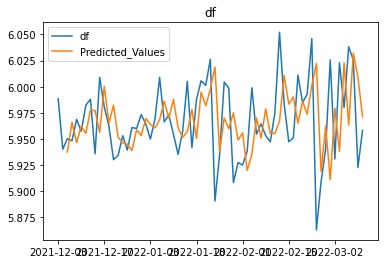

=================== mu ===================
Best p and q based on BIC: p=1, q=1


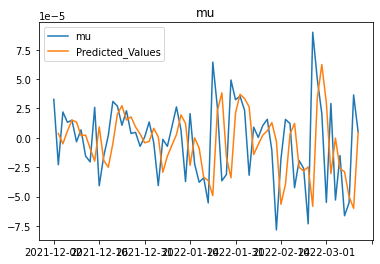

=================== sigma ===================
Best p and q based on BIC: p=1, q=1


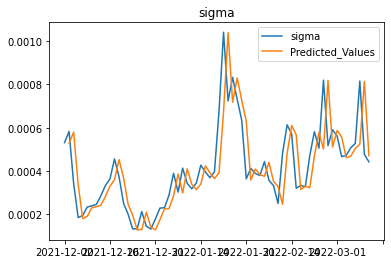

In [7]:
res = {}
for par in df.columns:
    print(f"=================== {par} ===================")
    results = arima.arima(1, 10, 1, 10, pd.DataFrame(df[par]), par, "BIC")
    results["data"][[par,'Predicted_Values']].plot()
    res[par] = results
    plt.title(par)
    plt.show()

In [8]:
results

{'data':                sigma  Shifted_values_1  Predicted_Values
 2021-12-02  0.000532          0.000445               NaN
 2021-12-03  0.000583          0.000532          0.000528
 2021-12-06  0.000343          0.000583          0.000580
 2021-12-07  0.000186          0.000343          0.000338
 2021-12-08  0.000195          0.000186          0.000181
 ...              ...               ...               ...
 2022-03-04  0.000508          0.000473          0.000469
 2022-03-07  0.000528          0.000508          0.000504
 2022-03-08  0.000816          0.000528          0.000524
 2022-03-09  0.000477          0.000816          0.000814
 2022-03-10  0.000443          0.000477          0.000471
 
 [68 rows x 3 columns],
 'params_AR': [array([1.]), -1.5585406229479126e-19, 0.0001781783871765366],
 'params_MA': [array([0.00647035]),
  -3.837040387715124e-06,
  0.00017895053509157195],
 'scores_AR': [-4484.115054800122, -4480.137086706994],
 'scores_MA': [-802.2363698943054, -798.29578606

In [17]:
inter_day = pd.read_csv("data/SPY_minute.csv", index_col=0)
inter_day.columns = inter_day.iloc[0]
inter_day = inter_day[1:]
inter_day.head(10)

Dates,Close,Volume
SPY US Equity,,
#NAME?,461.27,818361
12/1/21 9:31,460.81,348832
12/1/21 9:32,460.69,331253
12/1/21 9:33,460.76,271748
12/1/21 9:34,460.29,255663
12/1/21 9:35,460.49,287824
12/1/21 9:36,460.53,247480
12/1/21 9:37,460.63,178755
12/1/21 9:38,460.57,235893


In [10]:
inter_day["log"] = np.log(inter_day["Close"].astype(float))
inter_day["deltas"] = inter_day["log"].diff()
inter_day.head(10)

Dates,Close,Volume,log,deltas
SPY US Equity,,,,
#NAME?,461.27,818361,6.133984,NaN
12/1/21 9:31,460.81,348832,6.132986,-0.000998
12/1/21 9:32,460.69,331253,6.132725,-0.000260
12/1/21 9:33,460.76,271748,6.132877,0.000152
12/1/21 9:34,460.29,255663,6.131857,-0.001021
12/1/21 9:35,460.49,287824,6.132291,0.000434
12/1/21 9:36,460.53,247480,6.132378,0.000087
12/1/21 9:37,460.63,178755,6.132595,0.000217
12/1/21 9:38,460.57,235893,6.132465,-0.000130


In [11]:
samples = inter_day.deltas
samples = samples.dropna().tolist()
samples

[-0.0009977443132056507,
 -0.0002604449282221921,
 0.00015193445142891449,
 -0.0010205744330811228,
 0.00043441430775015277,
 8.68602202448443e-05,
 0.000217117548293011,
 -0.00013026487209000237,
 -0.0002605806620463724,
 0.0006730278909294896,
 0.00041227718629777144,
 0.0,
 -2.1694562258645078e-05,
 0.0,
 0.001084151974184877,
 -4.3343519067207126e-05,
 -0.00034031189805183715,
 -0.00024500955768314014,
 -0.0007592603000459164,
 -4.340371970545931e-05,
 0.00043395244562294266,
 -0.00017355838113619626,
 0.0006290058661546638,
 -0.0005422229102727272,
 0.0004771716824079064,
 -0.00017349063194060932,
 0.0005962479917762664,
 0.0004225787115723634,
 2.166589030672128e-05,
 0.0007580105834694706,
 0.0008309854146864026,
 0.0005968445267479083,
 -0.0004973456979406876,
 -0.00023794845283475752,
 0.0004325914457616875,
 -0.0004325914457616875,
 0.0004974640252255469,
 0.000562052804523816,
 0.0003025130211709026,
 0.00012962042836139887,
 -0.00015122546665669034,
 -8.642482126308693e-05,

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


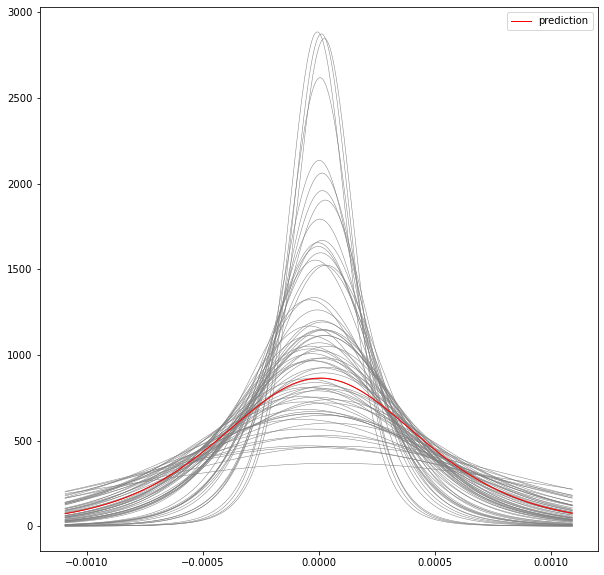

In [13]:
# from scipy.stats import t
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# dists = pd.read_csv('data/pars_t_daily_spy.csv')

# plt.rcParams["figure.figsize"] = (10,10)
# fig, ax = plt.subplots(1, 1)

# deltas = pd.read_csv('data/arr.csv')
# arr = deltas['deltas']
# x = np.linspace(min(arr), max(arr), 1000)

# for i in dists.index:
#     df = dists.loc[[i]].df
#     mean = dists.loc[[i]].mu
#     sd = dists.loc[[i]].sigma
#     ax.plot(x, t.pdf(x, df, mean, sd),
#        'gray', lw=.5)
    
# line, = ax.plot(x, t.pdf(x, df, mean, sd),
#        'red', lw=1, label='prediction')

# ax.legend()
# plt.savefig("myimage.eps", dpi=100000)
# plt.show()

In [ ]:
from scipy.stats import t
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
dists = pd.read_csv('data/pars_t_daily_spy.csv')



plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax = plt.axes(projection='3d')

deltas = pd.read_csv('data/arr.csv')
arr = deltas['deltas']
x = np.linspace(min(arr), max(arr), 1000)

for i in dists.index:
    df = dists.loc[[i]].df
    mean = dists.loc[[i]].mu
    sd = dists.loc[[i]].sigma
    ax.plot(x, t.pdf(x, df, mean, sd),
       'gray', lw=.5)
    
line, = ax.plot(x, t.pdf(x, df, mean, sd),
       'red', lw=1, label='prediction')

ax.legend()
plt.savefig("myimage.eps", dpi=100000)
plt.show()